In [1]:
from sampling import *
from sklearn.preprocessing import StandardScaler

2025-03-07 11:09:06.333185: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-07 11:09:06.411545: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-07 11:09:06.462435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741342146.520847    6956 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741342146.540070    6956 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 11:09:06.676111: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
import pandas as pd

# Load your dataset
df = pd.read_csv('task/train_set/x_train_aggregated.csv') # Replace with your file path
x = df.drop(columns=['AccountID'])
y_df = pd.read_csv('task/train_set/y_train.csv')
df['Fraudster'] = y_df['Fraudster']

df_val = pd.read_csv('task/validation_set/x_val_aggregated.csv')
x_val = df_val.drop(columns=['AccountID'])
yval_df = pd.read_csv('task/validation_set/y_val.csv')
df_val['Fraudster'] = yval_df['Fraudster']
y_val = yval_df['Fraudster']
# Display the first few rows
print(df.head())

# Check the distribution of the target variable (Fraudster)
print(df['Fraudster'].value_counts())

     AccountID  NumTransactions      AvgAmount   MaxAmount      TotalIn  \
0  C0001143040              562  146658.532989  3585064.01  35124031.74   
1  C0001332727              178  128888.997753   903276.53  13396604.25   
2  C0002641069               56  146342.356786  2571512.49   4547603.60   
3  C0002967890              103  117303.432330  3554689.54   3016367.57   
4  C0003513711               50  144333.040800  1563406.66   4462829.33   

       MaxIn     TotalOut  MaxCashOut  MaxDebit  MaxTransfer  MaxPayment  \
0  424498.32  47298063.80   284531.00   8893.26   3585064.01    27070.99   
1  341238.53   9545637.35   258056.33      0.00    903276.53    21396.14   
2  293992.40   3647568.38   204095.40   3594.16   2571512.49    14710.21   
3  392633.82   9065885.96   247445.60  23100.20   3554689.54    24640.16   
4  264727.14   2753822.71   142728.98   3080.34   1563406.66    16098.56   

   MaxFreqH  MaxFreqD  Fraudster  
0        12        84          0  
1         6        33 

/home/harsha/anaconda3/envs/bbdc25/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-07 11:09:13.431387: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5119 - loss: 0.7104 - val_accuracy: 0.5191 - val_loss: 0.6828
Epoch 2/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5045 - loss: 0.6961 - val_accuracy: 0.3276 - val_loss: 0.6951
Epoch 3/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5189 - loss: 0.6919 - val_accuracy: 0.2457 - val_loss: 0.7108
Epoch 4/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5176 - loss: 0.6925 - val_accuracy: 0.2395 - val_loss: 0.7087
Epoch 5/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5325 - loss: 0.6907 - val_accuracy: 0.3715 - val_loss: 0.6941
Epoch 6/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5230 - loss: 0.6915 - val_accuracy: 0.2733 - val_loss: 0.7090
Epoch 7/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5347 - loss: 0.6896 - val_accuracy: 0.3976 - val_loss: 0.6930
Epoch 8/50
583/583 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5365 - loss: 0.6890 - val_accuracy: 0.

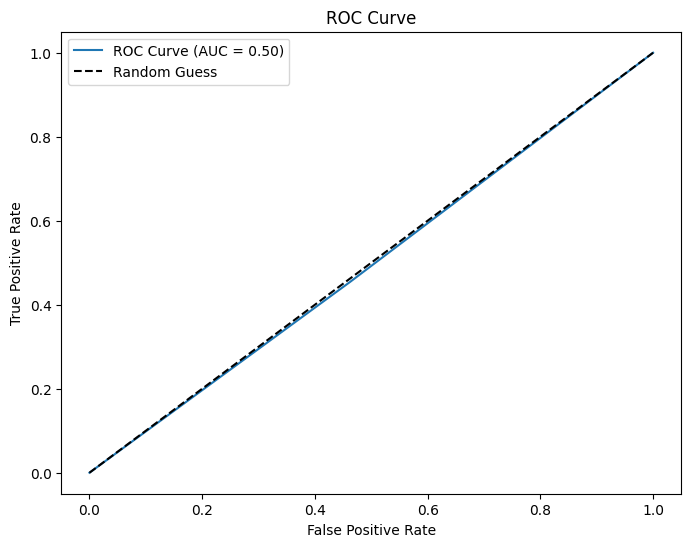

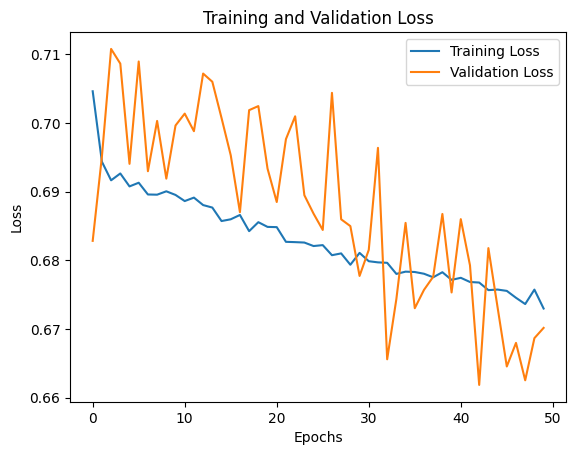

Epoch 1/50


/home/harsha/anaconda3/envs/bbdc25/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5122 - loss: 0.7303 - val_accuracy: 0.6151 - val_loss: 0.6793
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5049 - loss: 0.7163 - val_accuracy: 0.6048 - val_loss: 0.6795
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4978 - loss: 0.7101 - val_accuracy: 0.5702 - val_loss: 0.6845
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5098 - loss: 0.7033 - val_accuracy: 0.5568 - val_loss: 0.6844
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5159 - loss: 0.6935 - val_accuracy: 0.6252 - val_loss: 0.6783
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5141 - loss: 0.6968 - val_accuracy: 0.5471 - val_loss: 0.6831
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5040 - loss: 0.6970 - val_accuracy: 0.5798 - val_loss: 0.6817
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5097 - loss: 0.7015 - val_accuracy: 0.5163 - val_

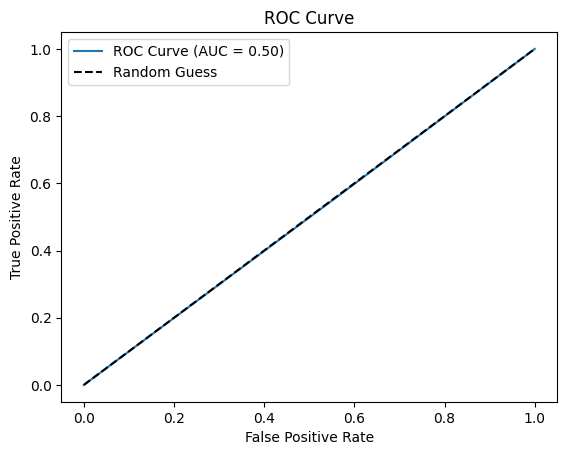

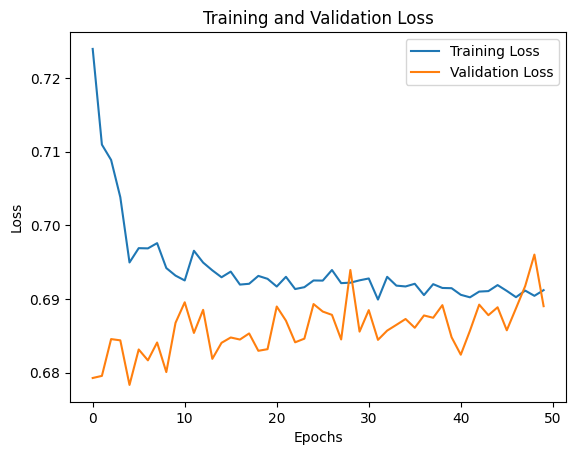

Epoch 1/50


/home/harsha/anaconda3/envs/bbdc25/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5195 - loss: 0.7053 - val_accuracy: 0.8506 - val_loss: 0.6341
Epoch 2/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5401 - loss: 0.6941 - val_accuracy: 0.8506 - val_loss: 0.6411
Epoch 3/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5540 - loss: 0.6893 - val_accuracy: 0.8506 - val_loss: 0.6417
Epoch 4/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5518 - loss: 0.6884 - val_accuracy: 0.8506 - val_loss: 0.6432
Epoch 5/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5571 - loss: 0.6891 - val_accuracy: 0.8506 - val_loss: 0.6392
Epoch 6/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5517 - loss: 0.6847 - val_accuracy: 0.8506 - val_loss: 0.6304
Epoch 7/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5614 - loss: 0.6853 - val_accuracy: 0.8506 - val_loss: 0.6299
Epoch 8/50
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5635 - loss: 0.6844 - val_accuracy: 0.8506 - val_

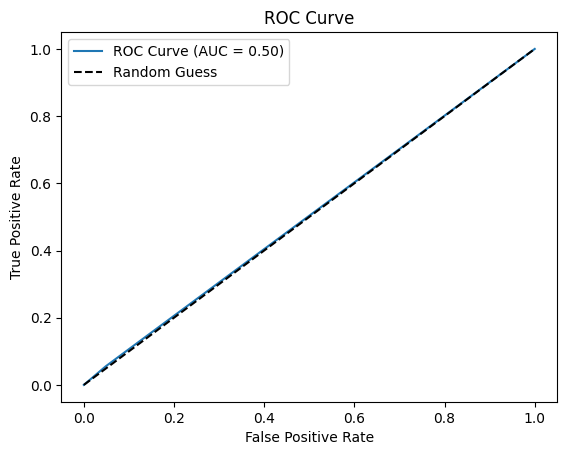

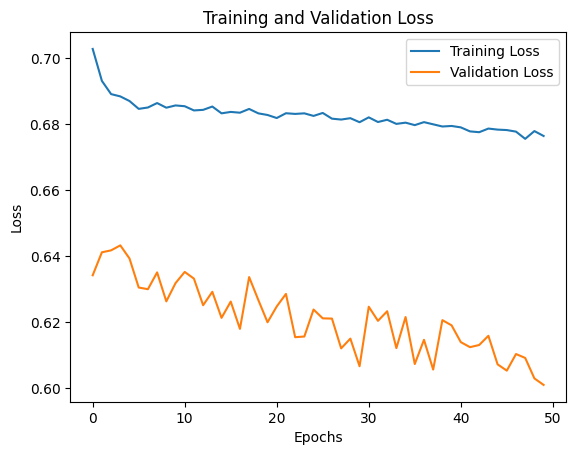

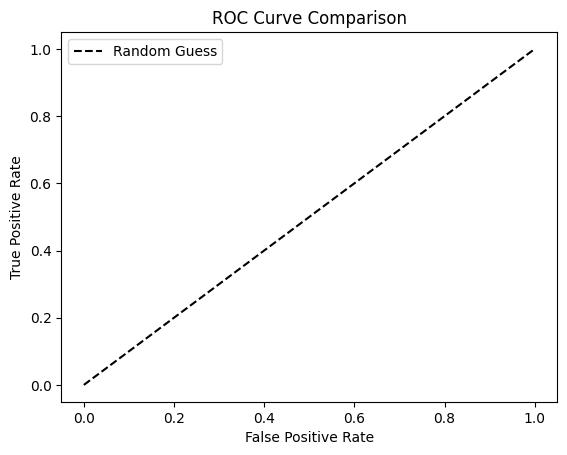

In [3]:
fraud_detector = FraudDetection(df,df_val)

# input_shape = X_unde.shape[1]  # Number of features
# model = build_nn_model(input_shape)
# Compare all approaches
fraud_detector.compare_approaches()

Epoch 1/50


/home/harsha/anaconda3/envs/bbdc25/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5071 - loss: 0.7139 - val_accuracy: 0.5281 - val_loss: 0.6849
Epoch 2/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5244 - loss: 0.6932 - val_accuracy: 0.3413 - val_loss: 0.6992
Epoch 3/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5327 - loss: 0.6906 - val_accuracy: 0.4061 - val_loss: 0.6911
Epoch 4/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5355 - loss: 0.6903 - val_accuracy: 0.3319 - val_loss: 0.6989
Epoch 5/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5313 - loss: 0.6894 - val_accuracy: 0.3262 - val_loss: 0.6981
Epoch 6/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5405 - loss: 0.6879 - val_accuracy: 0.3751 - val_loss: 0.6962
Epoch 7/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5255 - loss: 0.6906 - val_accuracy: 0.4035 - val_loss: 0.6912
Epoch 8/50
466/466 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5365 - loss: 0.6886 - val_accuracy: 0.4269 - val_

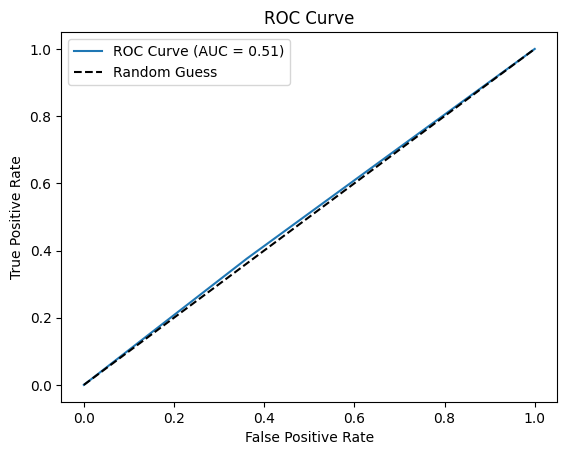

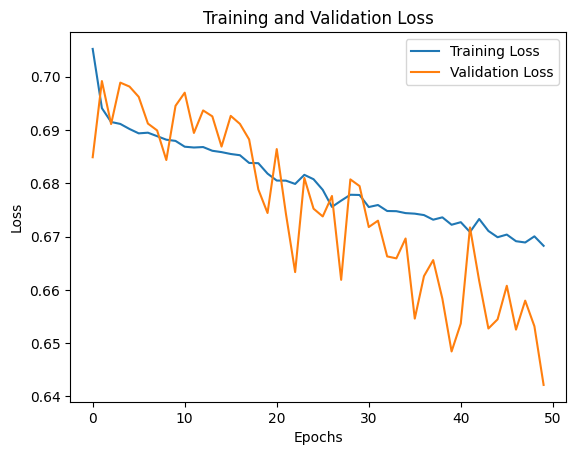

In [5]:
fraud_detector.preprocess_data()
scaler = StandardScaler()


# Generate oversampled data
X_train_smote, y_train_smote = fraud_detector.oversample_data()
X_scaled = scaler.fit_transform(x_val)
x_val = pd.DataFrame(scaler.transform(x_val), columns=x_val.columns)
input_shape = X_train_smote.shape[1]
# Train and evaluate the model using oversampled data
fraud_detector.NN_train_and_evaluate_model(input_shape,X_train_smote, y_train_smote, x_val, y_val, "Oversampling (SMOTE)",epochs=50, batch_size=32)